In [72]:
# a. The original input image
# b. Filtered Image obtained using spatial filtering
# c. Filtered Image obtained using frequency domain filtering
# d. Difference of the images obtained in b. and c.

import cv2
import numpy as np
import numpy.fft as n
import matplotlib.pyplot as plt
image = cv2.imread('/home/dmacs-5/Documents/mtech_2023/Image Processing/media/flower1.jpeg',cv2.IMREAD_GRAYSCALE)
D0 = 15 #cutoff frequency

def lowpassfilter(M, N, D0, n = None):
    U, V = np.meshgrid(np.arange(N), np.arange(M))
    D = np.hypot(U - M/2, V - N/2)
    H = np.double(D <= D0)
    return H

#getting the dimension of the image
M,N = image.shape
ILPF = lowpassfilter(M,N,D0)

#doing F(h)*F(f)
filtered_image2 = n.ifftshift(n.ifft2(n.fft2(image) * n.fft2(ILPF)))

# # plt.subplot(141)
# plt.imshow(image,cmap='gray')
# plt.title('Original Image')
# plt.axis('off')


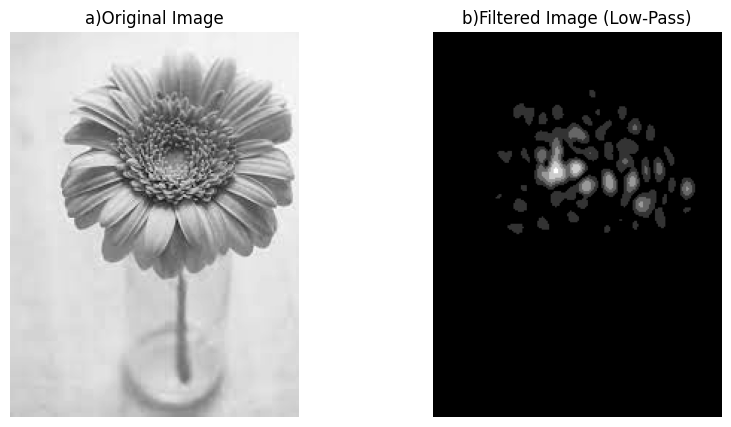

In [48]:

# Compute the 2D Fourier Transform of the image
F = n.fft2(image)
# Applying the filter in the frequency domain by element-wise multiplication
filtered_F = F * ILPF
# Computing the inverse 2D Fourier Transform to obtain the spatial domain
filtered_image1 = np.abs(n.ifft2(filtered_F))
filtered_image1 = np.uint8(filtered_image1)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title('a)Original Image')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image1, cmap='gray')
plt.title('b)Filtered Image (Low-Pass)')
plt.axis('off')
plt.show()


(-0.5, 193.5, 258.5, -0.5)

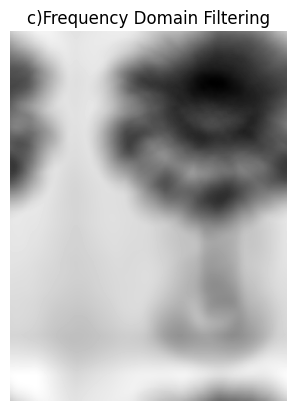

In [54]:
# plt.subplot(142)
plt.imshow(np.abs(filtered_image2),cmap='gray')
plt.title('c)Frequency Domain Filtering')
plt.axis('off')

Text(0.5, 1.0, 'd) Difference')

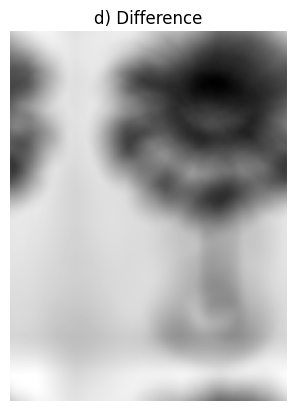

In [66]:
# m,n = np.abs(filtered_image2).shape
# filtered_image_resize =cv2.resize(np.abs(filtered_image2),(m,n))
# difference = cv2.subtract(np.abs(filtered_image1),filtered_image_resize)
difference = np.abs(filtered_image1 - filtered_image2)

plt.imshow(difference,cmap='gray')
plt.axis('off')
plt.title('d) Difference')

Text(0.5, 1.0, 'h) Filtered image')

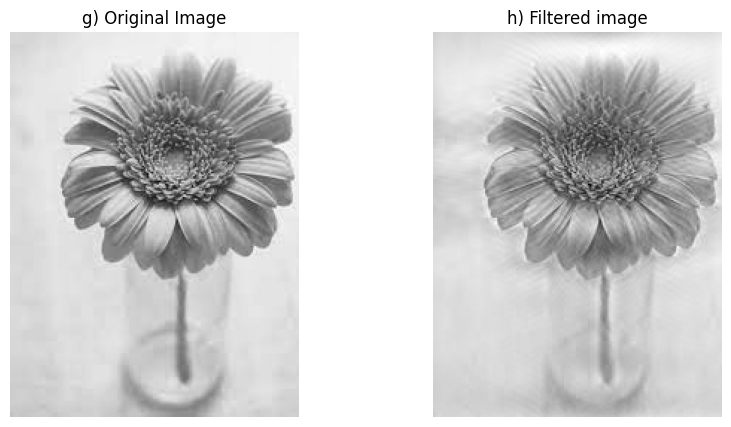

In [74]:
#NOTCH FILTERING
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)

# calculate amplitude spectrum
mag_spec = 20*np.log(np.abs(fshift)+1)


r = image.shape[0]/2        # number of rows/2
c = image.shape[1]/2        # number of columns/2   

p = 5                   # width of the line   
n = 10                  # to suppress all except for the DC component  
x = 200                 # Noise in the nbd

fshift2 = np.copy(fshift)

#vertical

# suppressing upper part
fshift2[0:int(r-n) , int(c-p):int(c+p)] = 0
# fshift2[0:int(n-r),int(p-c):] =0
fshift2[0: , int(c-p-x):int(c+p-x)] = 0
fshift2[0: , int(c-p+x):int(c+p+x)] = 0

# suppress lower part
fshift2[int(r+n):int(r+r), int(c-p):int(c+p)] = 0


#horizontal 
# suppress upper part
fshift2[int(r-p+50):int(r+p+50),0:int(c-n)] = 0
fshift2[int(r-p-50):int(r+p-50),0:int(c-n)] = 0
# suppressing lower part
fshift2[int(r-p+50):int(r+p+50),:int(c+c)] = 0
fshift2[int(r-p-50):int(r+p-50),:int(c+c)] = 0

# calculate new amplitude spectrum
mag_spec2 = 20*np.log(np.abs(fshift2)+1)

inv_fshift = np.fft.ifftshift(fshift2)

img_recon = np.real(np.fft.ifft2(inv_fshift))

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(image,cmap='gray')
plt.title('g) Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_recon,cmap='gray')
plt.axis('off')
plt.title('h) Filtered image')